### Treść zadania

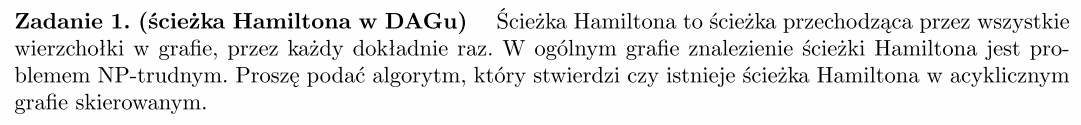

### Omówienie algorytmu

Algorytm opisany tutaj: https://stackoverflow.com/questions/16124844/algorithm-for-finding-a-hamilton-path-in-a-dag
<br><br>
W skrócie chodzi o to, aby początkowo posortować topologicznie graf. Musimy to uczynić, ponieważ poszukiwanie ścieżki Hamiltona w DAGu musimy rozpocząć od węzła, który nie ma krawędzi wchodzących. Następnie przechodzimy po kolejnych w porządku topologicznym wierzchołkach i sprawdzamy, czy istnieje krawędź między posortowanymi topologicznie sąsiednimi wierzchołkami. Istnienie krawędzi jest konieczne, aby graf posiadał ścieżkę Hamiltona, ponieważ tylko w ten sposób mozemy przejść przez wszystkie wierzchołki. Gdyby między parą sąsiednich wierzchołków (w tablicy posortowanych topologicznie wierzchołków) nie istniałaby krawędź w grafie, oznaczałoby to, że musimy pominąć jakiś wierzchołek, aby dostać się do następnego. W takiej sytuacji w grafie nie ma ścieżki Hamlitona.

### Złożoność

###### Obliczeniowa:
$ O(V + E) $  - bo taka jest złożoność sortowania topologicznego
###### Pamięciowa:
$ O(V) $  - zakładam, że graf jest dany na wejściu

### Implementacja

In [1]:
def topological_sort(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = [None] * n
    idx = n
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal idx
        idx -= 1
        result[idx] = u
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return result


def has_hamiltonian_path(G: 'DAG'):
    t_sorted = topological_sort(G)
    for i in range(len(t_sorted) - 1):
        u = t_sorted[i]
        for v in G[u]:
            # If we found a desired edge wich connects
            # the u vertex with the next topologically
            # sorted vertex
            if t_sorted[i + 1] == v:
                break
        # If a loop wasn't broken, there is no desired edge
        else:
            return False
    return True

###### Kilka testów

##### Pomocnicze

In [2]:
def directed_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append(e[1])
    return G

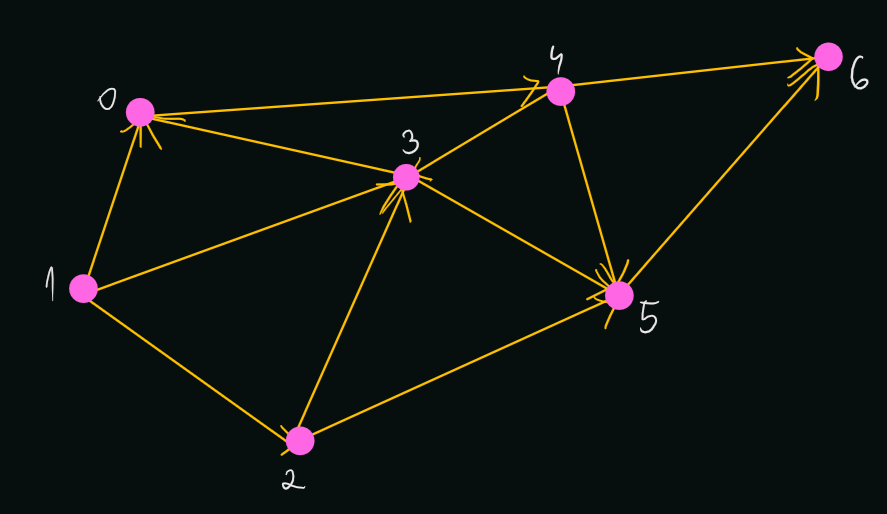

In [3]:
E = [(1, 0), (1, 2), (1, 3), (3, 0), (2, 3), (2, 5), (3, 5), (0, 4), (4, 5), (5, 6), (4, 6)]
G = directed_graph_list(E)
print(has_hamiltonian_path(G))

True


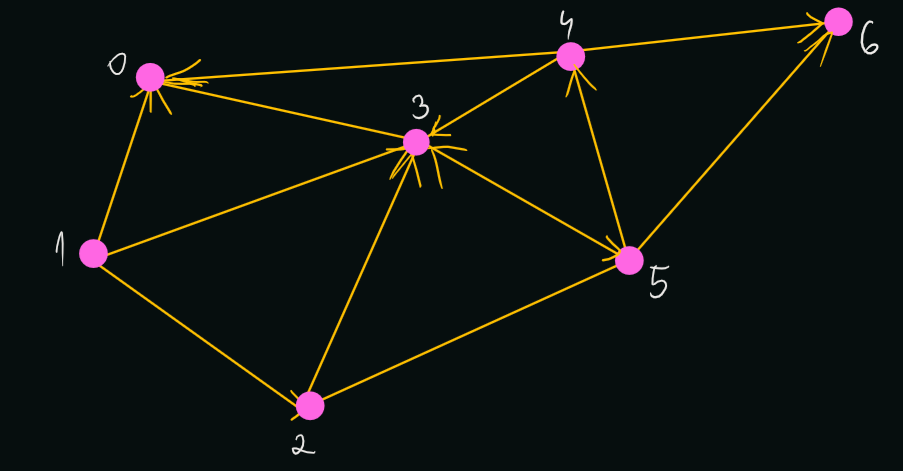

In [4]:
E = [(1, 0), (1, 2), (1, 3), (3, 0), (2, 3), (2, 5), (5, 3), (4, 0), (5, 4), (5, 6), (4, 6)]
G = directed_graph_list(E)
print(has_hamiltonian_path(G))

False


### (Dodatkowo) Zwracanie znalezionej ścieżki (jeżeli została znaleziona)

Warto zauważyć, że szukana ścieżka będzie zawierała kolejno wierzchołki z listy posortowanych topologicznie wierzchołków grafu $ G $. Zatem, jeżeli szukamy ścieżki, wystarczy zwrócić tablicę/listę posortowanych topologicznie wierzchołków.

In [5]:
def topological_sort(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = [None] * n
    idx = n
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal idx
        idx -= 1
        result[idx] = u
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return result


def hamiltonian_path(G: 'DAG'):
    t_sorted = topological_sort(G)
    for i in range(len(t_sorted) - 1):
        u = t_sorted[i]
        for v in G[u]:
            # If we found a desired edge wich connects
            # the u vertex with the next topologically
            # sorted vertex
            if t_sorted[i + 1] == v:
                break
        # If a loop wasn't broken, there is no desired edge
        else:
            return None
    return t_sorted

###### Kilka testów

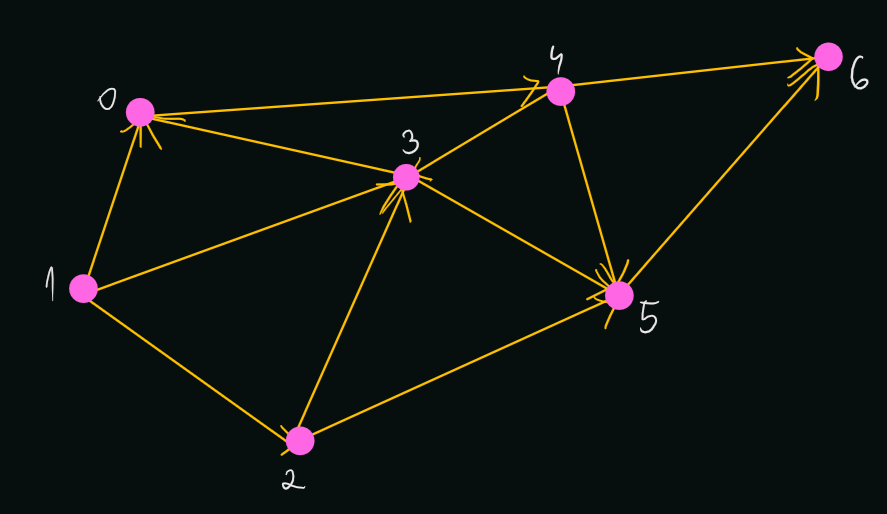

In [6]:
E = [(1, 0), (1, 2), (1, 3), (3, 0), (2, 3), (2, 5), (3, 5), (0, 4), (4, 5), (5, 6), (4, 6)]
G = directed_graph_list(E)
print(hamiltonian_path(G))

[1, 2, 3, 0, 4, 5, 6]


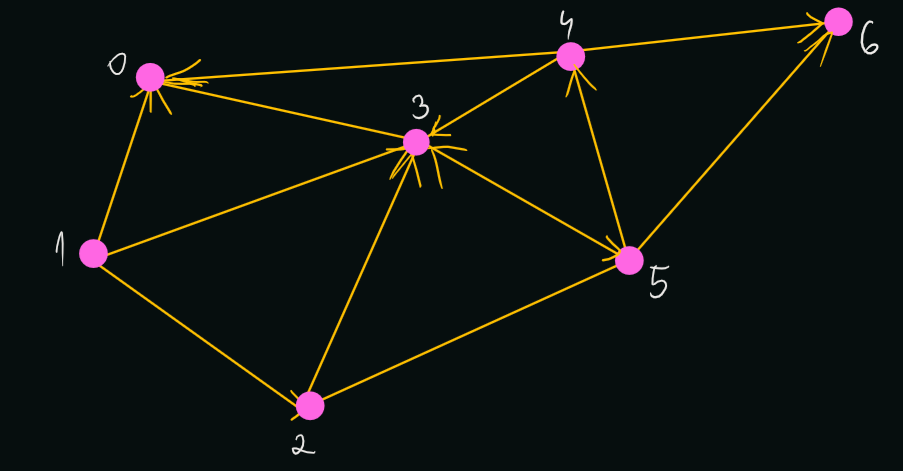

In [7]:
E = [(1, 0), (1, 2), (1, 3), (3, 0), (2, 3), (2, 5), (5, 3), (4, 0), (5, 4), (5, 6), (4, 6)]
G = directed_graph_list(E)
print(hamiltonian_path(G))

None
